In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
covid = pd.read_excel('covid.xlsx');
covid

,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,...,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,19,yes,yes,yes,yes,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,no
1,2,28,yes,yes,no,no,yes,no,yes,no,...,no,no,no,no,no,no,no,no,no,no
2,3,40,no,yes,no,no,yes,yes,yes,no,...,no,no,no,no,no,no,no,no,no,no
3,4,62,yes,yes,yes,yes,yes,no,yes,no,...,no,no,no,no,no,no,no,no,no,no
4,5,23,yes,yes,no,no,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,26,no,yes,no,no,no,no,yes,yes,...,yes,no,no,no,yes,yes,no,no,no,no
483,484,51,no,no,no,no,yes,yes,no,no,...,no,yes,yes,no,no,no,yes,yes,yes,no
484,485,32,no,no,no,no,yes,no,yes,yes,...,yes,yes,yes,no,no,yes,yes,yes,yes,no
485,486,30,no,no,no,no,yes,no,yes,yes,...,no,yes,no,no,no,yes,no,yes,yes,no


In [3]:
covid=covid.drop(['age','#'], axis=1);
covid

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,...,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,yes,yes,yes,yes,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
1,yes,yes,no,no,yes,no,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,no
2,no,yes,no,no,yes,yes,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,no
3,yes,yes,yes,yes,yes,no,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,no
4,yes,yes,no,no,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,no,yes,no,no,no,no,yes,yes,yes,yes,...,yes,no,no,no,yes,yes,no,no,no,no
483,no,no,no,no,yes,yes,no,no,yes,yes,...,no,yes,yes,no,no,no,yes,yes,yes,no
484,no,no,no,no,yes,no,yes,yes,yes,yes,...,yes,yes,yes,no,no,yes,yes,yes,yes,no
485,no,no,no,no,yes,no,yes,yes,no,yes,...,no,yes,no,no,no,yes,no,yes,yes,no


In [4]:
covid.describe()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,...,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
count,487,486,487,487,487,487,487,487,487,487,...,487,487,487,487,487,487,487,487,487,487
unique,2,3,4,3,4,2,3,3,2,4,...,2,2,2,2,2,2,2,2,2,2
top,no,no,no,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
freq,436,275,387,450,255,462,239,282,445,333,...,394,426,380,471,423,449,326,380,425,479


In [5]:
covid.Diarrhea.unique()

array(['yes', 'no', 'Yes', 'No'], dtype=object)

In [6]:
covid=covid.replace({'yes':'Yes', 'no':'No'});
covid.describe()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,...,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
count,487,486,487,487,487,487,487,487,487,487,...,487,487,487,487,487,487,487,487,487,487
unique,2,2,2,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,No,No
freq,436,283,410,450,267,462,249,282,445,341,...,394,426,380,471,423,449,326,380,425,479


In [7]:
covid.Abdominal_pain.unique()

array(['Yes', 'No', 'es'], dtype=object)

In [8]:
covid=covid.replace({'es':'Yes'});

In [9]:
covid.Abdominal_pain.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
np.where(pd.isnull(covid))


(array([396], dtype=int64), array([1], dtype=int64))

In [11]:
covid=covid.drop(covid.index[396])
np.where(pd.isnull(covid))

(array([], dtype=int64), array([], dtype=int64))

In [12]:
covid=covid.drop_duplicates(keep=False)
covid.shape

(205, 21)

In [13]:
covid=covid.replace({'Yes':1, 'No':0});
covid

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,...,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,1,0,0,0,0,1,1,1,1,...,1,0,0,0,1,1,0,0,0,0
483,0,0,0,0,1,1,0,0,1,1,...,0,1,1,0,0,0,1,1,1,0
484,0,0,0,0,1,0,1,1,1,1,...,1,1,1,0,0,1,1,1,1,0
485,0,0,0,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,1,1,0


In [14]:
covid.describe()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,...,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.146341,0.458537,0.204878,0.160976,0.541463,0.097561,0.497561,0.57561,0.175610,0.429268,...,0.302439,0.234146,0.346341,0.068293,0.234146,0.185366,0.321951,0.370732,0.248780,0.039024
std,0.354313,0.499498,0.404601,0.368408,0.499498,0.297446,0.501218,0.49546,0.381419,0.496183,...,0.460439,0.424501,0.476968,0.252865,0.424501,0.389545,0.468368,0.484183,0.433365,0.194127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Sleep_problems'}>,
        <AxesSubplot:title={'center':'Headache'}>,
        <AxesSubplot:title={'center':'Diarrhea'}>,
        <AxesSubplot:title={'center':'Abdominal_pain'}>,
        <AxesSubplot:title={'center':'body_pain'}>],
       [<AxesSubplot:title={'center':'Body_discoloration'}>,
        <AxesSubplot:title={'center':'Cough'}>,
        <AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Ague'}>,
        <AxesSubplot:title={'center':'Sore_throat'}>],
       [<AxesSubplot:title={'center':'Fatigue'}>,
        <AxesSubplot:title={'center':'runny_nose'}>,
        <AxesSubplot:title={'center':'Chest_pain'}>,
        <AxesSubplot:title={'center':'Decreased_appetite'}>,
        <AxesSubplot:title={'center':'Vomit'}>],
       [<AxesSubplot:title={'center':'Nausea'}>,
        <AxesSubplot:title={'center':'Sneezing'}>,
        <AxesSubplot:title={'center':'Shortness_of_breath'}>,
        <AxesSubplot:title={'center':'Loss_o

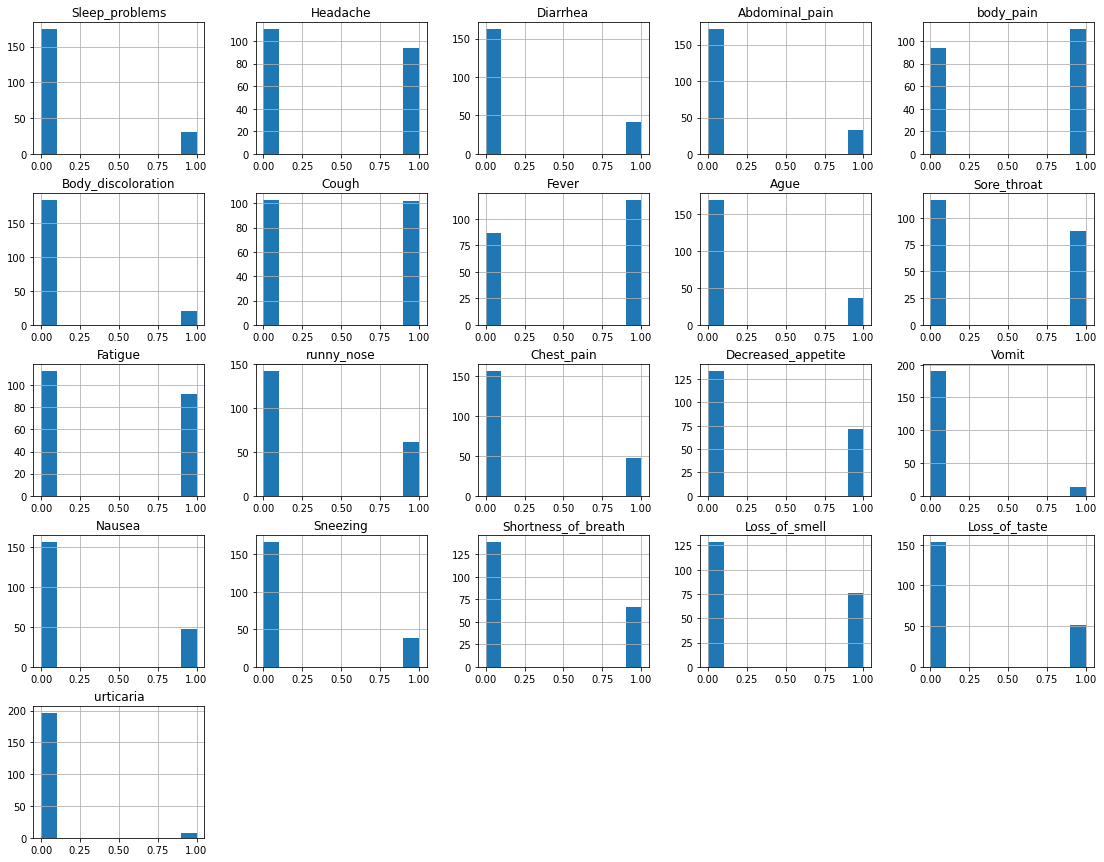

In [15]:
covid.hist(bins=10,figsize=(19,15))

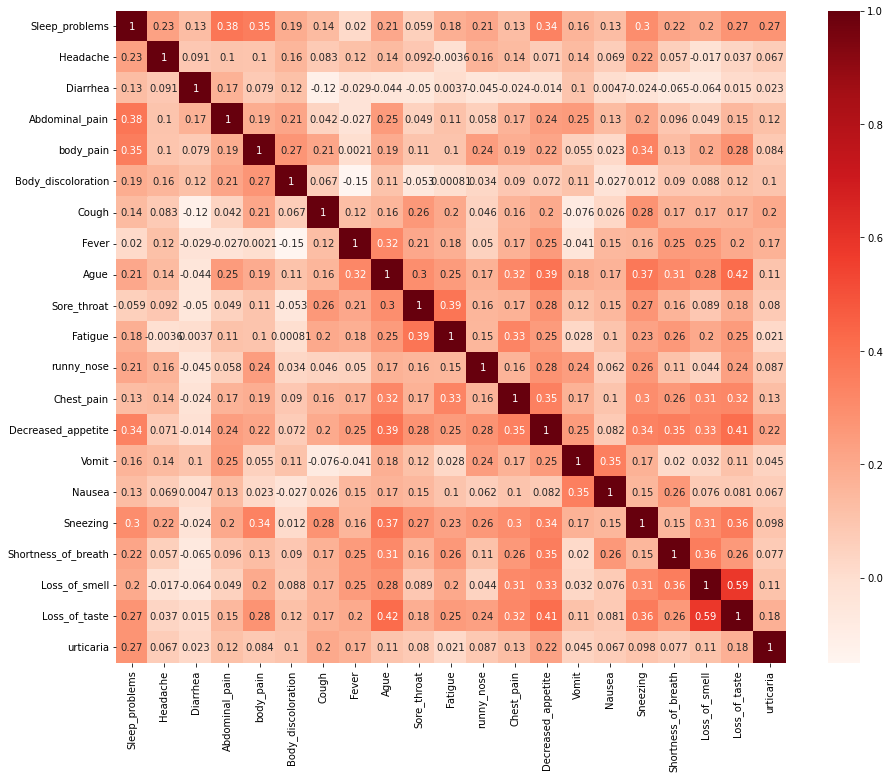

In [16]:
plt.figure(figsize=(15,12))
cor = covid.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
#urticaria,Vomit,Body-discoloration ,Ague,Sneezing

covid =covid.drop(['urticaria','Vomit','Body_discoloration' ,'Abdominal_pain','Sneezing'],axis=1)
covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0
483,0,0,0,1,0,0,1,1,1,0,1,1,0,1,1,1
484,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1
485,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1


In [18]:
columns={}
for col in covid.columns:
    columns[col]=[1,0];
columns

{'Sleep_problems': [1, 0],
 'Headache': [1, 0],
 'Diarrhea': [1, 0],
 'body_pain': [1, 0],
 'Cough': [1, 0],
 'Fever': [1, 0],
 'Ague': [1, 0],
 'Sore_throat': [1, 0],
 'Fatigue': [1, 0],
 'runny_nose': [1, 0],
 'Chest_pain': [1, 0],
 'Decreased_appetite': [1, 0],
 'Nausea': [1, 0],
 'Shortness_of_breath': [1, 0],
 'Loss_of_smell': [1, 0],
 'Loss_of_taste': [1, 0]}

In [19]:
from itertools import product
All_var=pd.DataFrame([row for row in product(*columns.values())],columns=columns.keys())

All_var

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
65532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
65533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
65534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
df4 = pd.concat([covid,All_var])
no_covid=df4.drop_duplicates(keep=False)
no_covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
65530,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
65532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
65534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
no_covid=no_covid[(no_covid.sum(axis=1)<9)  & (no_covid.sum(axis=1)>3)];
no_covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
255,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
383,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0
447,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0
479,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0
495,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65505,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
65506,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
65508,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1
65512,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [22]:
no_covid=no_covid.sample(n=250)
no_covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
27338,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1
6871,1,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0
24478,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1
56279,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
7125,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1
40567,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0
60186,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1
63107,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0


In [23]:
no_covid['class']=0;
covid['class']=1;
no_covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste,class
27338,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
6871,1,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0
24478,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
56279,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
7125,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0
40567,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
60186,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0
63107,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,0


In [24]:
dataset =pd.concat([no_covid,covid],ignore_index=True)


In [25]:
corr_matrix =dataset.corr();
corr_matrix['class'].sort_values(ascending=False)

class                  1.000000
Fever                  0.126992
body_pain              0.125037
Fatigue                0.102646
Cough                  0.077496
Headache               0.046730
Sore_throat            0.001275
Loss_of_smell         -0.066112
Decreased_appetite    -0.095209
runny_nose            -0.129293
Shortness_of_breath   -0.136398
Chest_pain            -0.164282
Nausea                -0.191834
Loss_of_taste         -0.202852
Diarrhea              -0.263229
Ague                  -0.266726
Sleep_problems        -0.316570
Name: class, dtype: float64

In [26]:
X=dataset.iloc[:,:-1]
y =dataset.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
450    1
451    1
452    1
453    1
454    1
Name: class, Length: 455, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4)

In [28]:
dataset_nominal=dataset.replace({1:'Yes', 0:'No'});
dataset_nominal

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste,class
0,Yes,No,No,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No
1,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,No,Yes,No,No,No,No
2,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,Yes,No
3,No,No,Yes,No,No,Yes,No,No,No,No,Yes,No,Yes,No,No,No,No
4,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes
451,No,No,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes
452,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
453,No,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes


In [29]:
# import csv
# with open('tennis1.csv', 'r') as f:
#     reader = csv.reader(f)
#     data = list(reader)    

h = ['0', '0', '0', '0', '0', '0','0','0','0','0','0','0','0','0','0','0','0']

for index, row in dataset_nominal.iterrows():
    if row[-1] == 'Yes':
        j = 0
        
        for col in row:
            if col != 'Yes':
                if col != h[j] and h[j] == '0':
                    h[j] = col
                elif col != h[j] and h[j] != '0':
                    h[j] = '?'
                    
            j = j + 1
 
    
print('Maximally Specific Hypothesis: ', h)

Maximally Specific Hypothesis:  ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', '0']


In [30]:
import numpy as np
import pandas as pd

def learn(concepts, target):
    
    specific_h = concepts[0].copy()
    
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    
    # The learning iterations
    for i, h in enumerate(concepts):
        
        # Checking if the hypothesis has a positive target
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                
                # Change values in S & G only if values change
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
                    
        # Checking if the hypothesis has a positive target
        if target[i] == "No":
            for x in range(len(specific_h)):
                
                # For negative hyposthesis change values only  in G
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    
    # find indices where we have empty rows, meaning those that are unchanged
    indices = [i for i,val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        # remove those rows from general_h
        general_h.remove(['?', '?', '?', '?', '?', '?'])
        
    # Return final values
    return specific_h, general_h
sample=dataset_nominal.sample(n=20);
concepts =np.array(sample.iloc[:,:-1]);
target=np.array(sample.iloc[:,-1]);
s_final, g_final = learn(concepts, target)
print("Final S:", s_final, sep="\n")
print("Final G:", g_final, sep="\n")

Final S:
['?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?']
Final G:
[['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred
gnb.score(X_test, y_test)

0.7956204379562044

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred=neigh.predict(X_test)
y_pred
neigh.score(X_test, y_test)

0.7591240875912408

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
y_pred
clf.score(X_test, y_test)

0.7591240875912408

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
y_pred
clf.score(X_test, y_test)

0.7737226277372263

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,splitter='random')
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
y_pred
clf.score(X_test, y_test)

0.7737226277372263

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
#

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
dataset.to_excel("covid5.xlsx",index=False)